# Sequencing-mapping-workflow-s

Experiment:
- Data: SRR2960981_1.100K.fastq.gz  SRR2960981_2.100K.fastq.gz

Pipeline:

1. Environment setting
2. Download squence reads
3. Trim reads (trimmomatic)
4. Mapping (bwa)
5. SAM to BAM (samtool)
6. Sorted BAM (samtool)
7. Mappingstats (samtool)

Date: 2023-02-02

Developer: Jing

## Environment

In [2]:
# To check available memory
!cat /proc/meminfo | grep MemTotal

# To check available number of threads
!cat /proc/cpuinfo | grep processor | wc -l

!!lscpu |grep 'Model name' # CPU

# !!nvidia-smi # GPU

MemTotal:       26690612 kB
4


['Model name:                      AMD EPYC 7B12']

## 01. Environment setting

In [3]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",START" >> log.txt

In [4]:
# Install Java

!sudo apt-get update
!sudo apt install default-jdk
!sudo apt install default-jre

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:13 http://security.ubuntu.com/ubuntu fo

In [5]:
!java -version

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [6]:
# Install Bioconda + mamba

! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda config --add channels bioconda
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-02 21:05:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>]  84.90M  82.7MB/s    in 1.0s    

2023-02-02 21:05:13 (82.7 MB/s) - ‘miniconda.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - chardet==4.0.0=py37h06a4308_1003
    - conda-package-handl

In [7]:
# Install packages

!conda install -y -c bioconda bwa 
!conda install -y -c bioconda samtools 
!conda install -y -c bioconda trimmomatic

Solving environment: | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bwa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bwa-0.7.17                 |       h7132678_9         187 KB  bioconda
    perl-5.32.1                | 2_h7f98852_perl5        14.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        14.6 MB

The following NEW packages will be INSTALLED:

  bwa                bioconda/linux-64::bwa-0.7.17-h7132678_9 None
  perl               conda-forge/linux-64::perl-5.32.1-2_h7f98852_perl5 None



bwa

In [8]:
%%bash
python --version
conda --version
conda config --show channels

Python 3.7.12
conda 22.9.0
channels:
  - bioconda
  - conda-forge
  - defaults


In [9]:
!bwa


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

In [10]:
!samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 1.6 (using htslib 1.6)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     rmdup          remove PCR duplicates
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if SAM/BAM/CRAM file appears intact
     fastq          con

In [11]:
!trimmomatic -version

0.39


In [12]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",01. Environment setting" >> log.txt

## 02. Download Reads

- Illumina MiSeq paired end sequencing (100K Read Pairs)
- https://www.ebi.ac.uk/ena/browser/view/SRR957824

In [13]:
# download SRR2960981_1.100K.fastq.gz  SRR2960981_2.100K.fastq.gz 

!wget https://github.com/jingwora/bioinformatics-tools/raw/main/projects/Clara-Parabrick_singularity/data_small/SRR2960981_1.100K.fastq.gz
!wget https://github.com/jingwora/bioinformatics-tools/raw/main/projects/Clara-Parabrick_singularity/data_small/SRR2960981_2.100K.fastq.gz

--2023-02-02 21:07:31--  https://github.com/jingwora/bioinformatics-tools/raw/main/projects/Clara-Parabrick_singularity/data_small/SRR2960981_1.100K.fastq.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jingwora/bioinformatics-tools/main/projects/Clara-Parabrick_singularity/data_small/SRR2960981_1.100K.fastq.gz [following]
--2023-02-02 21:07:32--  https://raw.githubusercontent.com/jingwora/bioinformatics-tools/main/projects/Clara-Parabrick_singularity/data_small/SRR2960981_1.100K.fastq.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18713083 (18M) [application/octet-stream]
Saving to: ‘SRR

In [14]:
# # full data load
# !wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR296/001/SRR2960981/SRR2960981_1.fastq.gz
# !wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR296/001/SRR2960981/SRR2960981_2.fastq.gz

In [15]:
# # trim to 100K pairs reads
# !gzip -dc SRR2960981_1.fastq.gz | head -n 400000 > SRR2960981_1.100K.fastq
# !gzip -dc SRR2960981_2.fastq.gz | head -n 400000 > SRR2960981_2.100K.fastq

In [16]:
# !gzip  SRR2960981_1.100K.fastq
# !gzip  SRR2960981_2.100K.fastq

In [17]:
!ls

log.txt  sample_data  SRR2960981_1.100K.fastq.gz  SRR2960981_2.100K.fastq.gz


In [18]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",02. Download Reads" >> log.txt

## 03. Trim reads

In [19]:
!trimmomatic -h

Usage: 
       PE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] [-validatePairs] [-basein <inputBase> | <inputFile1> <inputFile2>] [-baseout <outputBase> | <outputFile1P> <outputFile1U> <outputFile2P> <outputFile2U>] <trimmer1>...
   or: 
       SE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] <inputFile> <outputFile> <trimmer1>...
   or: 
       -version


In [20]:
# Downlod adapter
# https://github.com/timflutre/trimmomatic/tree/master/adapters

!wget https://github.com/timflutre/trimmomatic/raw/master/adapters/TruSeq2-PE.fa

--2023-02-02 21:07:35--  https://github.com/timflutre/trimmomatic/raw/master/adapters/TruSeq2-PE.fa
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/timflutre/trimmomatic/master/adapters/TruSeq2-PE.fa [following]
--2023-02-02 21:07:35--  https://raw.githubusercontent.com/timflutre/trimmomatic/master/adapters/TruSeq2-PE.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 539 [text/plain]
Saving to: ‘TruSeq2-PE.fa’

TruSeq2-PE.fa       100%[===================>]     539  --.-KB/s    in 0s      

2023-02-02 21:07:35 (37.2 MB/s) - ‘TruSeq2-PE.fa’ saved [539/539]



In [21]:
%%bash
# Trimming
#  PE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] [-validatePairs] [-basein <inputBase> | <inputFile1> <inputFile2>] [-baseout <outputBase> | <outputFile1P> <outputFile1U> <outputFile2P> <outputFile2U>] <trimmer1>...

trimmomatic PE -phred33 -threads 4                         \
     SRR2960981_1.100K.fastq.gz SRR2960981_2.100K.fastq.gz \
     SRR2960981_1.clean.fastq SRR2960981_1.unpaired.fastq  \
     SRR2960981_2.clean.fastq SRR2960981_2.unpaired.fastq  \
     ILLUMINACLIP:TruSeq2-PE.fa:2:30:10 LEADING:30 TRAILING:30 SLIDINGWINDOW:4:15 MINLEN:100

TrimmomaticPE: Started with arguments:
 -phred33 -threads 4 SRR2960981_1.100K.fastq.gz SRR2960981_2.100K.fastq.gz SRR2960981_1.clean.fastq SRR2960981_1.unpaired.fastq SRR2960981_2.clean.fastq SRR2960981_2.unpaired.fastq ILLUMINACLIP:TruSeq2-PE.fa:2:30:10 LEADING:30 TRAILING:30 SLIDINGWINDOW:4:15 MINLEN:100
Using PrefixPair: 'AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCT' and 'CAAGCAGAAGACGGCATACGAGATCGGTCTCGGCATTCCTGCTGAACCGCTCTTCCGATCT'
Using Long Clipping Sequence: 'AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCATT'
Using Long Clipping Sequence: 'AGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTG'
Using Long Clipping Sequence: 'TTTTTTTTTTAATGATACGGCGACCACCGAGATCTACAC'
Using Long Clipping Sequence: 'TTTTTTTTTTCAAGCAGAAGACGGCATACGA'
Using Long Clipping Sequence: 'CAAGCAGAAGACGGCATACGAGATCGGTCTCGGCATTCCTGCTGAACCGCTCTTCCGATCT'
Using Long Clipping Sequence: 'AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCT'
ILLUMINACLIP: Using 1 prefix pairs, 6 f

In [22]:
!ls

log.txt			     SRR2960981_2.100K.fastq.gz
sample_data		     SRR2960981_2.clean.fastq
SRR2960981_1.100K.fastq.gz   SRR2960981_2.unpaired.fastq
SRR2960981_1.clean.fastq     TruSeq2-PE.fa
SRR2960981_1.unpaired.fastq


In [23]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",03. Trim reads" >> log.txt

## 04. Mapping

In [24]:
# Load Reference
# https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/

!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz

--2023-02-02 21:07:39--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972898531 (928M) [application/x-gzip]
Saving to: ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’

GCF_000001405.40_GR 100%[===================>] 927.83M  32.6MB/s    in 29s     

2023-02-02 21:08:08 (31.8 MB/s) - ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’ saved [972898531/972898531]



In [25]:
# move file to ref folder

!mkdir ref
!mv GCF_000001405.40_GRCh38.p14_genomic.fna.gz ref/GRCh38.p14.fna.gz

In [26]:
# indexing

!bwa index ref/GRCh38.p14.fna.gz

[bwa_index] Pack FASTA... tcmalloc: large alloc 1073741824 bytes == 0x55f4fddbe000 @  0x7fab5b448680 0x7fab5b468bdd 0x55f4ac72169b 0x55f4ac70f52c 0x55f4ac725bee 0x55f4ac726452 0x55f4ac6ee6d2 0x7fab5b0b1083 0x55f4ac6ee825
tcmalloc: large alloc 1649221632 bytes == 0x55f53de32000 @  0x7fab5b448680 0x7fab5b468bdd 0x55f4ac72169b 0x55f4ac70f83c 0x55f4ac725bee 0x55f4ac726452 0x55f4ac6ee6d2 0x7fab5b0b1083 0x55f4ac6ee825
29.85 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6596861272, availableWord=476179232
tcmalloc: large alloc 1904721920 bytes == 0x55f4ae0b4000 @  0x7fab5b448680 0x7fab5b4682ec 0x55f4ac7215bd 0x55f4ac722392 0x55f4ac7240a6 0x55f4ac7244d6 0x55f4ac725c6e 0x55f4ac726452 0x55f4ac6ee6d2 0x7fab5b0b1083 0x55f4ac6ee825
[BWTIncConstructFromPacked] 10 iterations done. 99999992 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999992 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999992 characters proces

In [27]:
!ls ref

GRCh38.p14.fna.gz      GRCh38.p14.fna.gz.ann  GRCh38.p14.fna.gz.pac
GRCh38.p14.fna.gz.amb  GRCh38.p14.fna.gz.bwt  GRCh38.p14.fna.gz.sa


In [48]:
!du -sh ref/GRCh38.p14.fna.gz ref/GRCh38.p14.fna.gz.ann ref/GRCh38.p14.fna.gz.pac ref/GRCh38.p14.fna.gz.amb ref/GRCh38.p14.fna.gz.bwt ref/GRCh38.p14.fna.gz.sa

928M	ref/GRCh38.p14.fna.gz
92K	ref/GRCh38.p14.fna.gz.ann
787M	ref/GRCh38.p14.fna.gz.pac
24K	ref/GRCh38.p14.fna.gz.amb
3.1G	ref/GRCh38.p14.fna.gz.bwt
1.6G	ref/GRCh38.p14.fna.gz.sa


In [28]:
#  aligning sequence reads

!bwa mem -t 4 ref/GRCh38.p14.fna.gz SRR2960981_1.clean.fastq SRR2960981_1.clean.fastq > SRR2960981.sam

tcmalloc: large alloc 3298435072 bytes == 0x559b2d084000 @  0x7fdc50d84680 0x7fdc50da42ec 0x559b2b6d75bd 0x559b2b6c40b5 0x559b2b6c77a8 0x559b2b6c78a9 0x559b2b6bb7e3 0x559b2b6a4744 0x7fdc509ed083 0x559b2b6a4825
tcmalloc: large alloc 1649221632 bytes == 0x559bf1afc000 @  0x7fdc50d84680 0x7fdc50da42ec 0x559b2b6d75bd 0x559b2b6c3f5e 0x559b2b6c77d4 0x559b2b6c78a9 0x559b2b6bb7e3 0x559b2b6a4744 0x7fdc509ed083 0x559b2b6a4825
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 165410 sequences (40000070 bp)...
[M::process] read 27954 sequences (6764088 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 0, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] skip orientation FR as there are not enough pairs
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 165410 reads in 111.833 CPU sec, 28.376 real sec
[M::mem_pe

In [29]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",04. Mapping" >> log.txt

## 05. SAM to BAM

In [30]:
# convert SAM to BAM

!samtools view -S -b SRR2960981.sam > SRR2960981.bam

In [31]:
!du -sh SRR2960981.bam SRR2960981.sam

19M	SRR2960981.bam
99M	SRR2960981.sam


In [32]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",05. SAM to BAM" >> log.txt   

## 06. Sorted BAM

In [33]:
# sort bam file

!samtools sort -o SRR2960981.sorted.bam SRR2960981.bam

In [34]:
!du -sh SRR2960981.sorted.bam SRR2960981.bam

19M	SRR2960981.sorted.bam
19M	SRR2960981.bam


In [35]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",06. Sorted BAM" >> log.txt   

## 07. Mapping stats

In [52]:
# get mapping statistics

!samtools flagstat SRR2960981.sorted.bam > mappingstats.txt

In [53]:
!cat mappingstats.txt

193535 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
171 + 0 supplementary
0 + 0 duplicates
1393 + 0 mapped (0.72% : N/A)
193364 + 0 paired in sequencing
96682 + 0 read1
96682 + 0 read2
0 + 0 properly paired (0.00% : N/A)
1222 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
464 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [38]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",07. Mappingstats" >> log.txt   

In [44]:
!ls

figure1.png	  SRR2960981_1.100K.fastq.gz   SRR2960981_2.unpaired.fastq
log.txt		  SRR2960981_1.clean.fastq     SRR2960981.bam
mappingstats.txt  SRR2960981_1.unpaired.fastq  SRR2960981.sam
ref		  SRR2960981_2.100K.fastq.gz   SRR2960981.sorted.bam
sample_data	  SRR2960981_2.clean.fastq     TruSeq2-PE.fa


In [45]:
!du -sh SRR2960981.sorted.bam

19M	SRR2960981.sorted.bam


## Summary

In [39]:
# time log

!cat log.txt

2023-02-02 21:05:03 ,START
2023-02-02 21:07:31 ,01. Environment setting
2023-02-02 21:07:35 ,02. Download Reads
2023-02-02 21:07:39 ,03. Trim reads
2023-02-02 22:33:11 ,04. Mapping
2023-02-02 22:33:16 ,05. SAM to BAM
2023-02-02 22:33:20 ,06. Sorted BAM
2023-02-02 22:33:20 ,07. Mappingstats


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.ticker as plticker

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')

In [41]:
# read log file

df = pd.read_csv("log.txt", names=["timestamp", "steps"])
df["timestamp"] = pd.to_datetime(df.timestamp)
df["duration(second)"] = (df["timestamp"] - df["timestamp"].shift(+1)).astype('timedelta64[s]')
df["duration(minute)"] = (df["timestamp"] - df["timestamp"].shift(+1)).astype('timedelta64[m]')
df = df.dropna()
df["duration(second)"] = df["duration(second)"].astype("int")

df

,timestamp,steps,duration(second),duration(minute)
1,2023-02-02 21:07:31,01. Environment setting,148,2.0
2,2023-02-02 21:07:35,02. Download Reads,4,0.0
3,2023-02-02 21:07:39,03. Trim reads,4,0.0
4,2023-02-02 22:33:11,04. Mapping,5132,85.0
5,2023-02-02 22:33:16,05. SAM to BAM,5,0.0
6,2023-02-02 22:33:20,06. Sorted BAM,4,0.0
7,2023-02-02 22:33:20,07. Mappingstats,0,0.0


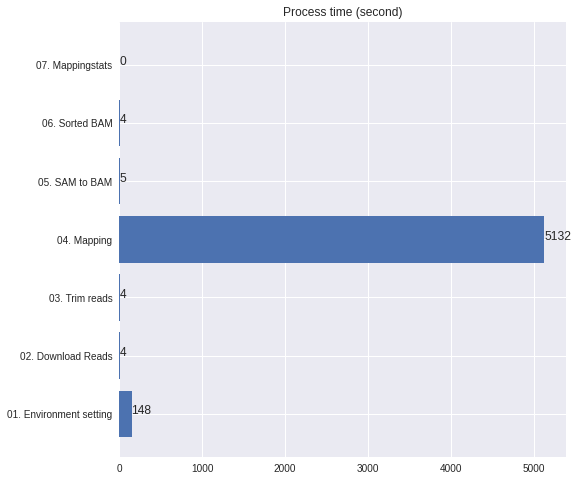

<Figure size 576x576 with 0 Axes>

In [42]:
# Bar grah
plt.rcParams["figure.figsize"] = (8,8)

def get_bar_chart(df):
  x = df['steps']
  y = df['duration(second)']

  plt.barh(x, y)
  plt.title(f"Process time (second)")

  for index, value in enumerate(y):
      plt.text(value, index, str(value),  fontsize=12)
  
  plt.show()
  plt.savefig('figure1.png')


get_bar_chart(df)

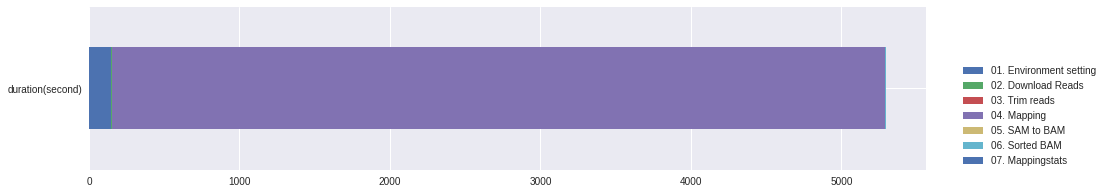

steps,01. Environment setting,02. Download Reads,03. Trim reads,04. Mapping,05. SAM to BAM,06. Sorted BAM,07. Mappingstats
duration(second),148,4,4,5132,5,4,0


<Figure size 1080x216 with 0 Axes>

In [54]:
plt.rcParams["figure.figsize"] = (15,3)

def get_staced_chart(df):
  df = df[["steps", "duration(second)"]].T
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])

  df.plot.barh(stacked=True)
  plt.legend(loc=(1.04, 0))

  plt.show()
  plt.savefig('figure2.png')

  return df

get_staced_chart(df)

In [55]:
# move output to drive

!cp log.txt figure1.png  figure2.png SRR2960981.sorted.bam mappingstats.txt /content/drive/MyDrive/data/output_s

Ref:
- https://bi.biopapyrus.jp/rnaseq/mapping/bwa/bwa-long-dna-paired-reads.html